<p style = "font-size : 42px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 7px 7px;"><strong>EDA &  predict the closing price of a stock.</strong></p>

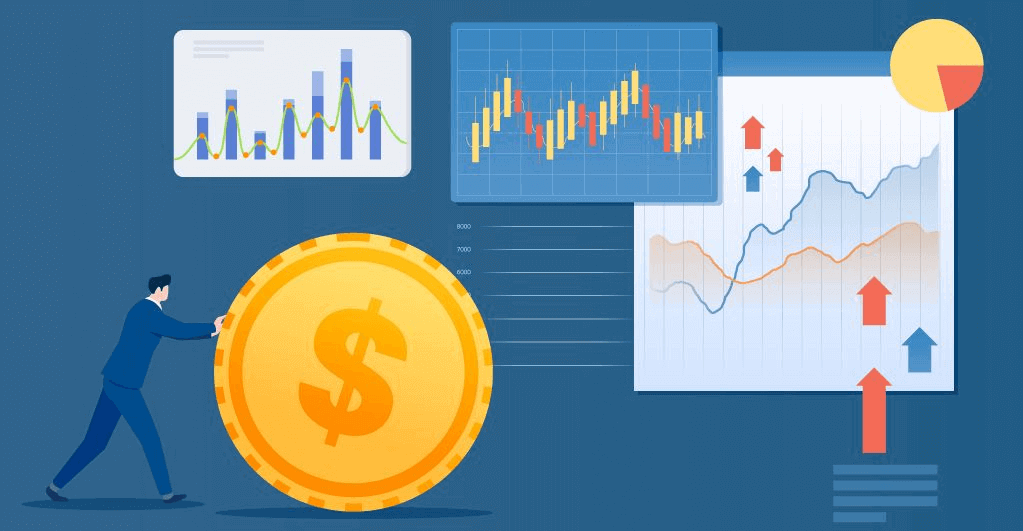

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 


* [Importing libraries](#1.0)
* [Reading Datasets](#2.0)
* [First Dataset(EGX_DLY_COMI, 1D)](#3.0)
* [Second Dataset(EGX_DLY_EGX30, 1D)](#4.0)
* [Third Dataset(EGX_DLY_EMFD, 1D)](#5.0)
* [Fourth Dataset(EGX_DLY_ISPH, 1D)](#6.0)



<a id = '1.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Importing libraries</strong></p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error , mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Reading datasets </strong></p>

In [122]:
df1 = pd.read_csv('EGX_DLY_COMI, 1D.csv')
df2 = pd.read_csv('EGX_DLY_EGX30, 1D.csv')
df3 = pd.read_csv('EGX_DLY_EMFD, 1D.csv')
df4 = pd.read_csv('EGX_DLY_ISPH, 1D.csv')

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>First Dataset(EGX_DLY_COMI, 1D) </strong></p>

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #508D69 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C1F2B0; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA) : </strong></p>


<p style = "font-size : 35px; color : #22668D ; font-family : 'Comic Sans MS'; text-align : center; background-color : #8ECDDD; border-radius: 5px 5px;"><strong>head() - shape - info() - describe() - dtypes </strong></p>

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5529 non-null   int64  
 1   open    5529 non-null   float64
 2   high    5529 non-null   float64
 3   low     5529 non-null   float64
 4   close   5529 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 216.1 KB


In [124]:
df1.head()

,time,open,high,low,close
0,989910000,0.839019,0.839019,0.827202,0.831220
1,989996400,0.827202,0.836419,0.823184,0.826020
2,990082800,0.827202,0.827202,0.820111,0.824366
3,990342000,0.815621,0.821293,0.815385,0.816566
4,990428400,0.813257,0.850836,0.809476,0.831456


In [125]:
df1.shape

(5529, 5)

In [126]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
time,5529.0,1.347961e+09,2.083471e+08,9.899100e+08,1.165997e+09,1.349338e+09,1.528272e+09,1.707984e+09
open,5529.0,1.589982e+01,1.609520e+01,6.026756e-01,3.450615e+00,7.604309e+00,2.991603e+01,8.900000e+01
high,5529.0,1.611315e+01,1.632811e+01,6.026756e-01,3.545152e+00,7.734061e+00,3.039063e+01,9.548000e+01
low,5529.0,1.570425e+01,1.589889e+01,6.003121e-01,3.357595e+00,7.476685e+00,2.951820e+01,8.600000e+01
close,5529.0,1.591288e+01,1.611910e+01,6.022029e-01,3.469266e+00,7.619199e+00,2.991603e+01,8.900000e+01


In [127]:
df1.dtypes

time       int64
open     float64
high     float64
low      float64
close    float64
dtype: object

In [128]:
# convert col time to datetime data type

df1['time'] = pd.to_datetime(df1['time'])

In [129]:
df1.dtypes

time     datetime64[ns]
open            float64
high            float64
low             float64
close           float64
dtype: object

In [130]:
df1.head()

,time,open,high,low,close
0,1970-01-01 00:00:00.989910000,0.839019,0.839019,0.827202,0.831220
1,1970-01-01 00:00:00.989996400,0.827202,0.836419,0.823184,0.826020
2,1970-01-01 00:00:00.990082800,0.827202,0.827202,0.820111,0.824366
3,1970-01-01 00:00:00.990342000,0.815621,0.821293,0.815385,0.816566
4,1970-01-01 00:00:00.990428400,0.813257,0.850836,0.809476,0.831456


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Since we have converted time column into datetime, Now we can extract the year,month, and date so we can drop the time column.
    
</div>


In [131]:
df1['year']=df1['time'].dt.year
df1['month']=df1['time'].dt.month
df1['day']=df1['time'].dt.day
df1['hour'] = df1['time'].dt.hour
df1['minute'] = df1['time'].dt.minute

In [132]:
df1.head()

,time,open,high,low,close,year,month,day,hour,minute
0,1970-01-01 00:00:00.989910000,0.839019,0.839019,0.827202,0.831220,1970,1,1,0,0
1,1970-01-01 00:00:00.989996400,0.827202,0.836419,0.823184,0.826020,1970,1,1,0,0
2,1970-01-01 00:00:00.990082800,0.827202,0.827202,0.820111,0.824366,1970,1,1,0,0
3,1970-01-01 00:00:00.990342000,0.815621,0.821293,0.815385,0.816566,1970,1,1,0,0
4,1970-01-01 00:00:00.990428400,0.813257,0.850836,0.809476,0.831456,1970,1,1,0,0


In [133]:
df1['year'].unique()

array([1970])

In [134]:
df1['month'].unique()

array([1])

In [135]:
df1['day'].unique()

array([1])

In [136]:
df1['hour'].unique()

array([0])

In [137]:
df1['minute'].unique()

array([0])

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* The data is all extracted on the same day and has the same date and also at the same hour and minute. Therefore, I will delete this column because it is not important and does not make any difference in the process of building the model..
    
</div>


In [138]:
df1 = df1.drop(columns= ['time','year','month','day','hour','minute'])

In [139]:
df1.head()

,open,high,low,close
0,0.839019,0.839019,0.827202,0.831220
1,0.827202,0.836419,0.823184,0.826020
2,0.827202,0.827202,0.820111,0.824366
3,0.815621,0.821293,0.815385,0.816566
4,0.813257,0.850836,0.809476,0.831456


<p style = "font-size : 35px; color : #22668D ; font-family : 'Comic Sans MS'; text-align : center; background-color : #8ECDDD; border-radius: 5px 5px;"><strong>Checking for null values </strong></p>

In [140]:
df1.isna().sum()

open     0
high     0
low      0
close    0
dtype: int64

<p style = "font-size : 35px; color : #22668D ; font-family : 'Comic Sans MS'; text-align : center; background-color : #8ECDDD; border-radius: 5px 5px;"><strong>Checking for Duplicated Values </strong></p>

In [141]:
df1.duplicated().sum()

3

In [142]:
df1.shape

(5529, 4)

In [143]:
df1.drop_duplicates(inplace=True)

In [144]:
df1.shape

(5526, 4)

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #508D69 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C1F2B0; border-radius: 5px 5px;"><strong>Analysis and Visualization : </strong></p>


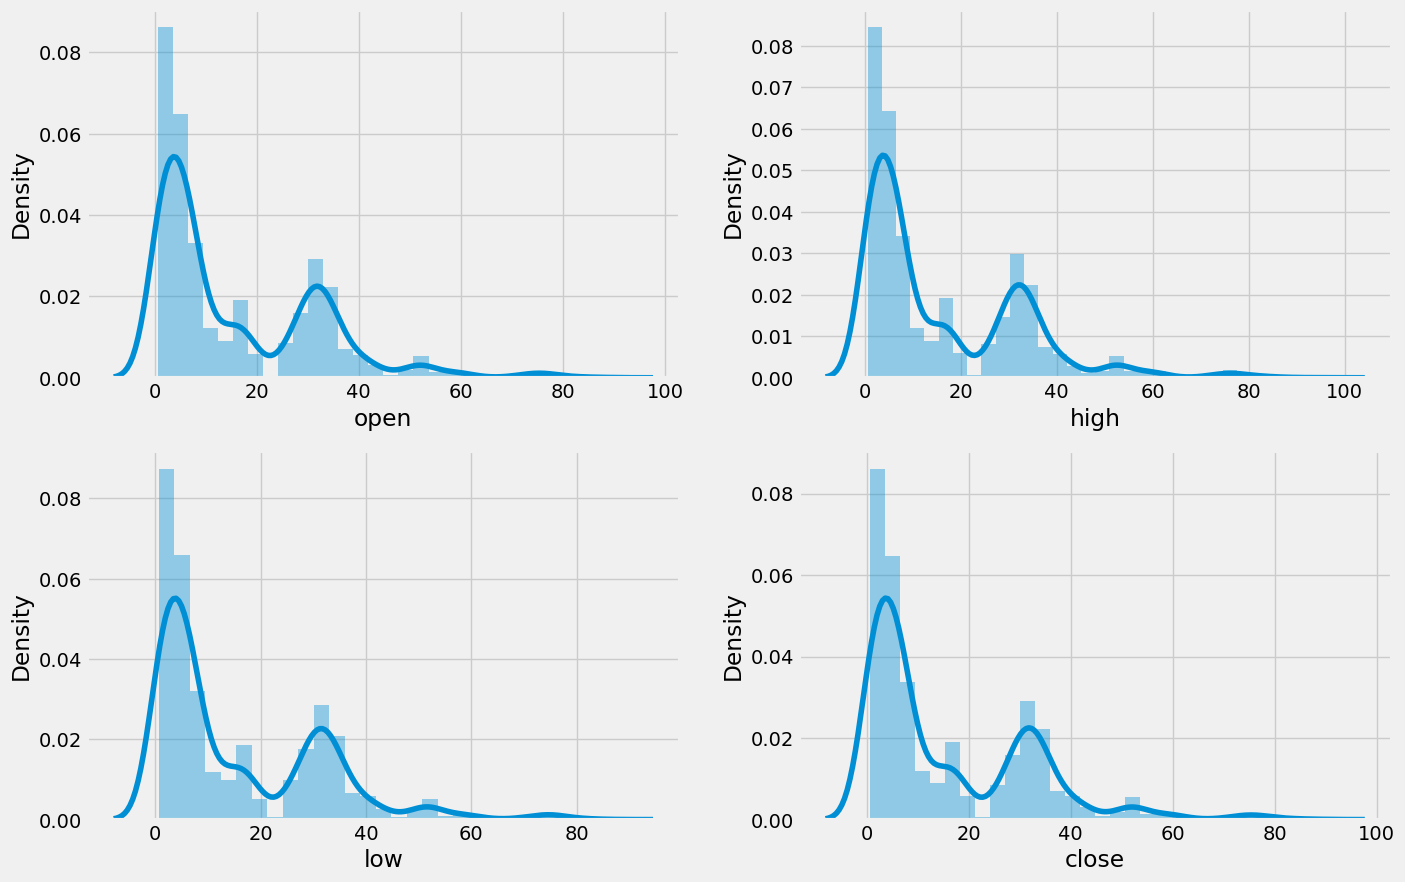

In [145]:
# distributions for variables 

fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15, 10))

for i, column in enumerate(df1.columns):
    sns.distplot(df1[column],ax=axes.flatten()[i])   
    
fig.savefig("df1_fig1.png", dpi=300)  


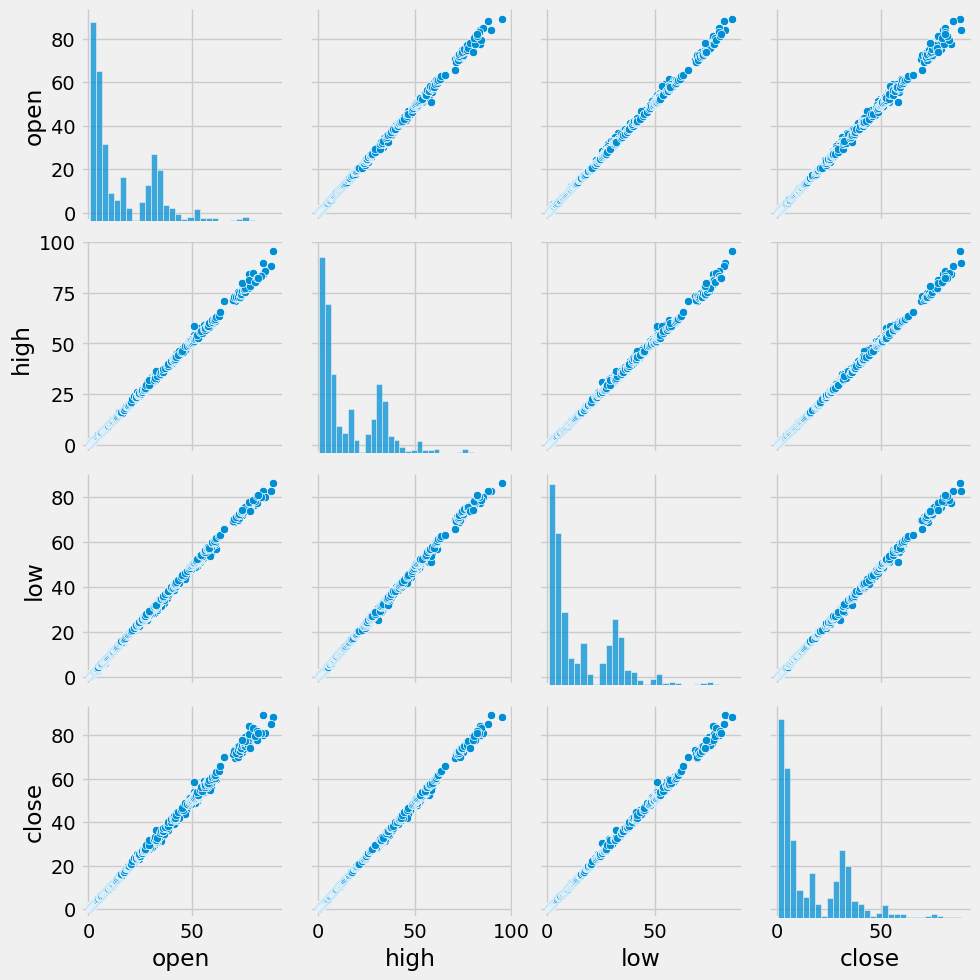

In [146]:
sns.pairplot(df1)

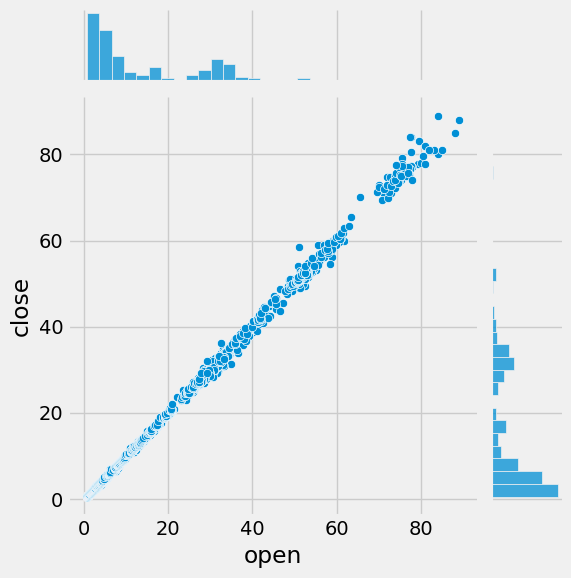

In [147]:
sns.jointplot(x='open',y='close',data=df1,kind='scatter')

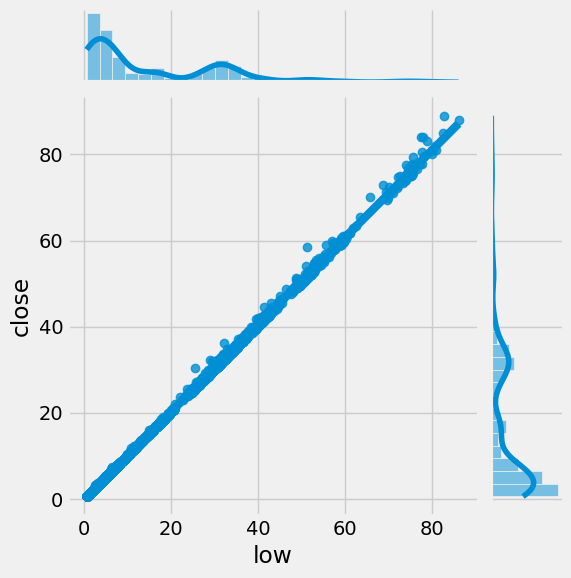

In [148]:
sns.jointplot(x='low',y='close',data=df1,kind='reg')

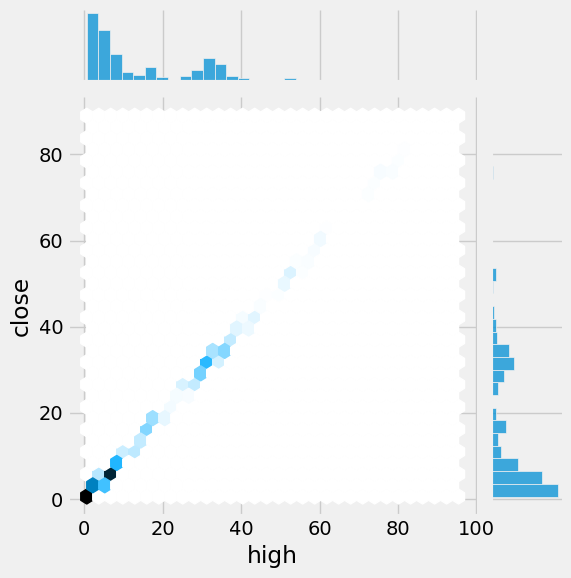

In [149]:
sns.jointplot(x='high',y='close',data=df1,kind='hex')

<p style = "font-size : 35px; color : #22668D ; font-family : 'Comic Sans MS'; text-align : center; background-color : #8ECDDD; border-radius: 5px 5px;"><strong>Outliers Detection </strong></p>

In [150]:
outliers = detect_outliers(df1, 0,df1.columns)
len(outliers)

69

<Axes: >

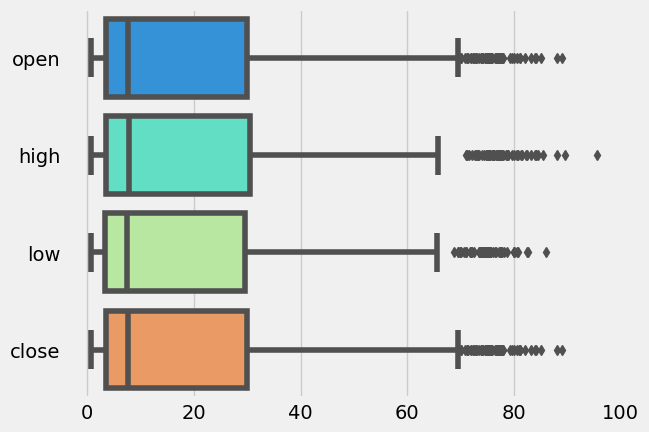

In [151]:
sns.boxplot(data=df1,palette='rainbow',orient='h')

In [152]:
# use z-score to handel the outliers
df1['open_zScore'] = ( df1.open - df1.open.mean() ) / df1.open.std()
df1['high_zScore'] = ( df1.high - df1.high.mean() ) / df1.high.std()
df1['low_zScore'] = ( df1.low - df1.low.mean() ) / df1.low.std()

df1.head()

,open,high,low,close,open_zScore,high_zScore,low_zScore
0,0.839019,0.839019,0.827202,0.831220,-0.936215,-0.935932,-0.936211
1,0.827202,0.836419,0.823184,0.826020,-0.936949,-0.936091,-0.936463
2,0.827202,0.827202,0.820111,0.824366,-0.936949,-0.936656,-0.936657
3,0.815621,0.821293,0.815385,0.816566,-0.937669,-0.937018,-0.936954
4,0.813257,0.850836,0.809476,0.831456,-0.937816,-0.935208,-0.937326


In [153]:
# Get data points that has z score higher than 3 or lower than -3.
# data points that are more than 3 standard deviation away

df1[(df1.open_zScore<-3) | (df1.open_zScore>3) | 
     (df1.high_zScore<-3)|(df1.high_zScore>3)|
      (df1.low_zScore<-3)|(df1.low_zScore>3)]

,open,high,low,close,open_zScore,high_zScore,low_zScore
5459,63.400002,65.680000,63.270000,65.599998,2.950601,3.035071,2.991163
5460,65.599998,71.000000,65.599998,70.099998,3.087284,3.360879,3.137709
5461,70.099998,73.199997,68.760002,73.000000,3.366862,3.495612,3.336459
5462,73.000000,73.000000,71.010002,71.160004,3.547034,3.483364,3.477974
5463,71.160004,71.599998,69.900002,70.800003,3.432718,3.397624,3.408160
...,...,...,...,...,...,...,...
5524,80.489998,80.500000,78.019997,79.550003,4.012376,3.942680,3.918872
5525,79.550003,84.500000,78.750000,83.120003,3.953976,4.187649,3.964785
5526,83.120003,83.120003,80.019997,81.059998,4.175774,4.103135,4.044663
5527,81.059998,82.400002,80.529999,81.989998,4.047789,4.059040,4.076739


In [154]:
# shape before removing the outliers
df1.shape

(5526, 7)

In [155]:
# Remove the outliers and produce new dataframe
df1 = df1[(df1.open_zScore>-3)& (df1.open_zScore<3) &
          (df1.high_zScore>-3)&(df1.high_zScore<3)&
           (df1.low_zScore>-3)&(df1.low_zScore<3)]

In [156]:
df1.shape

(5456, 7)

In [157]:
outliers = detect_outliers(df1, 0,df1.columns)
len(outliers)

0

<Axes: >

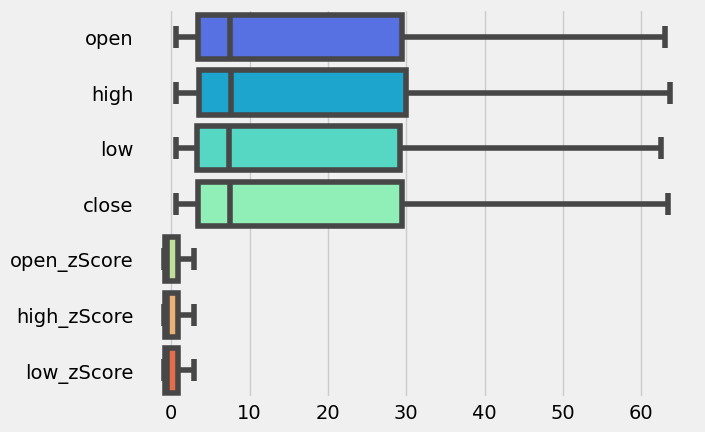

In [158]:
sns.boxplot(data=df1,palette='rainbow',orient='h')

In [159]:
# drop columns --> open_zScore , high_zScore , low_zScore
df1.drop(columns=['open_zScore' , 'high_zScore' , 'low_zScore'] , inplace=True)
df1.head()

,open,high,low,close
0,0.839019,0.839019,0.827202,0.831220
1,0.827202,0.836419,0.823184,0.826020
2,0.827202,0.827202,0.820111,0.824366
3,0.815621,0.821293,0.815385,0.816566
4,0.813257,0.850836,0.809476,0.831456


<Axes: xlabel='open', ylabel='Density'>

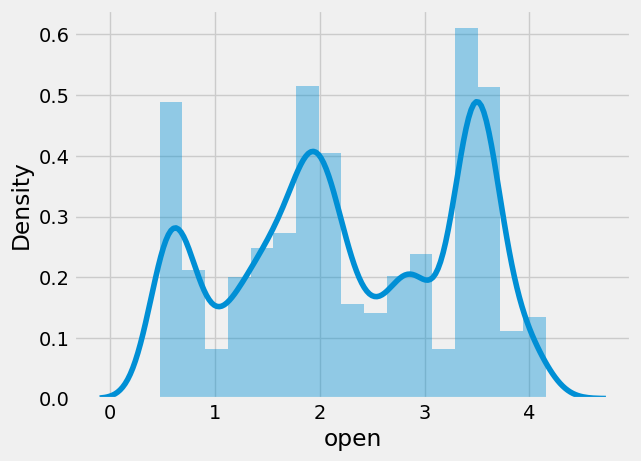

In [160]:
# Normalized  open col using logarithm to give more semblance of a normal distribution
sns.distplot(np.log(df1['open']+1))

In [161]:
df1['open'] = np.log(df1['open']+1)
df1['high'] = np.log(df1['high']+1)
df1['low'] = np.log(df1['low']+1)
df1['close'] = np.log(df1['close']+1)

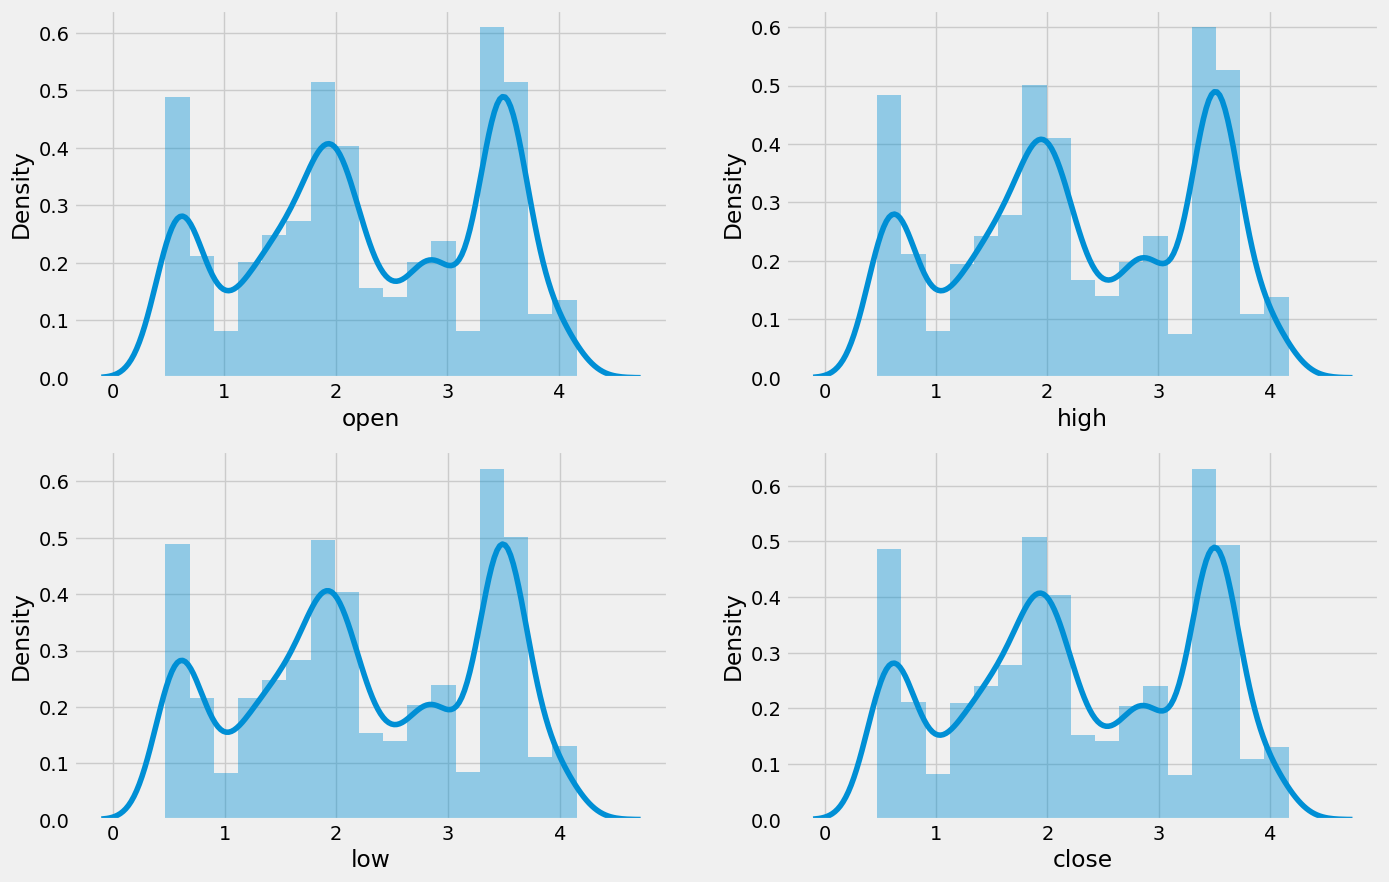

In [162]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15, 10))

for i, column in enumerate(df1.columns):
    sns.distplot(df1[column],ax=axes.flatten()[i]) 

<p style = "font-size : 35px; color : #22668D ; font-family : 'Comic Sans MS'; text-align : center; background-color : #8ECDDD; border-radius: 5px 5px;"><strong>Feture Selection </strong></p>

<Axes: >

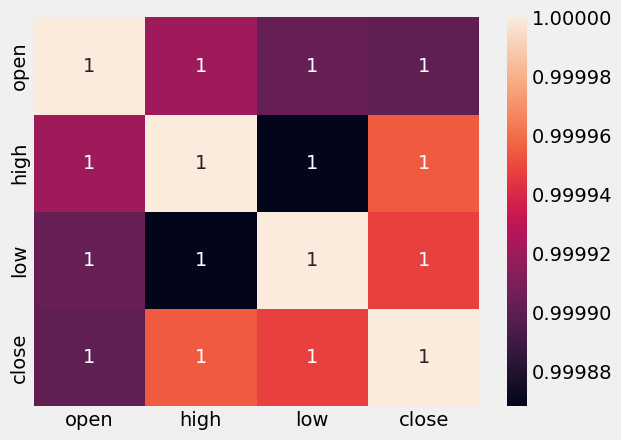

In [163]:
# corrilation
sns.heatmap(df1.corr(),annot=True)

In [164]:
# null hypothesis test

# calculate Pearson correlation coefficient and p-value
# Create an empty DataFrame to store the correlations and p-values

corr_df = pd.DataFrame(columns=['r', 'p-value'])

for col in df1:
    r , p = stats.pearsonr(df1.close , df1[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)] # Add the r & p for this col into the corr_df
   
        
corr_df.sort_values(by=['r'], ascending=False)    # Sort and display the corr_df

,r,p-value
open,1.0,0.0
high,1.0,0.0
low,1.0,0.0
close,1.0,0.0


##  **i will select all featuers because each of them have a large corrilation with the target and i will reject the null hypothesis**

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #508D69 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C1F2B0; border-radius: 5px 5px;"><strong>Split dataset into train & test : </strong></p>


In [165]:
x = df1.drop(columns=['close'])
y = df1['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [166]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3819, 3)
X_test shape is  (1637, 3)
y_train shape is  (3819,)
y_test shape is  (1637,)


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #508D69 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C1F2B0; border-radius: 5px 5px;"><strong>Feature Scaling : </strong></p>


In [167]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [168]:
y_train

4609    3.463672
3878    3.422724
539     0.628326
954     1.188061
405     0.496579
          ...   
4174    3.498255
602     0.767247
1364    1.545989
1550    1.738623
4962    3.482079
Name: close, Length: 3819, dtype: float64

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #508D69 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C1F2B0; border-radius: 5px 5px;"><strong>Defining ML models : </strong></p>


In [169]:
modles = {
    'Linear Regression' : LinearRegression(),
    'Bayesian Ridge' : BayesianRidge(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
    
 
}


for modelName,model in modles.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('\n**************************************************',' \n[ **********',modelName,'********** ] ','\n**************************************************')
    
    print('\n      Testing Accurcy : ',model.score(X_test, y_test))
    print('\n      Training Accurcy : ',model.score(X_train,y_train ))
    print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
    print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
    print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
    #sns.distplot(y_test-y_pred_test)
 




**************************************************  
[ ********** Linear Regression ********** ]  
**************************************************

      Testing Accurcy :  0.9996925016979634

      Training Accurcy :  0.9999749432748183

      MAE: 0.015194880244977131

      MSE: 0.0003444125507822804

      RMSE: 0.01855835528225172

**************************************************  
[ ********** Bayesian Ridge ********** ]  
**************************************************

      Testing Accurcy :  0.9996925017494732

      Training Accurcy :  0.9999749432709529

      MAE: 0.015194788054230262

      MSE: 0.00034441249308890087

      RMSE: 0.018558353727874163

**************************************************  
[ ********** Lasso ********** ]  
**************************************************

      Testing Accurcy :  0.13325968738104854

      Training Accurcy :  0.1315699987586899

      MAE: 0.8562039735579063

      MSE: 0.9707898871565896

      RMSE: 0.985286703

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #508D69 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C1F2B0; border-radius: 5px 5px;"><strong>Model improvement : </strong></p>


- Most of the models provided very high results, so we do not need improvement, but as an experiment, I will choose theRandom Forest Regressor model and try to improve it.

In [ ]:
# define models and parameters
RFR = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth = [3, 7, 9]
min_samples_split = [2,5,10,15,20,50]
min_samples_leaf =[0.25,0.5]
max_features =[1,2]
criterion = ["squared_error", "absolute_error", "friedman_mse", "poisson"]

# define grid search
grid = dict(n_estimators=n_estimators, 
            max_depth=max_depth,
            min_samples_split = min_samples_split,
            min_samples_leaf = min_samples_leaf,
            max_features = max_features,
            criterion = criterion
           )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RFR, param_distributions=grid, n_jobs=-1, scoring='accuracy',error_score=0,verbose=2)
grid_result = grid_search.fit(X_train, y_train)


# summarize results

print(grid_search.best_params_)

model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('\n**************************************************',' \n[ ',model,' ] ','\n**************************************************')
print('\t      Training Accurcy : ',model.score(X_train , y_train))
print('\t      Test ing Accurcy : ',model.score(X_test, y_test))
print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred))
print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))




**************************************************  
[ ********** Random Forest Regressor ********** ]  
**************************************************

      Testing Accurcy :  0.9996678228044916

      Training Accurcy :  0.9999942566384978

      MAE: 0.01547331691008279

      MSE: 0.0003720540713851614

      RMSE: 0.019288703206414924


<Axes: xlabel='close', ylabel='Density'>

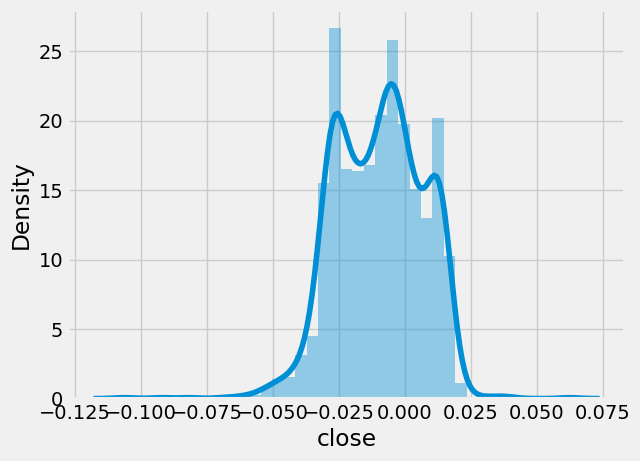

In [170]:
# i will choose the Random Forest Regressor

first_model = RandomForestRegressor()
first_model.fit(X_train , y_train)

y_pred_test = first_model.predict(X_test)
y_pred_train = first_model.predict(X_train)
print('\n**************************************************',' \n[ ********** Random Forest Regressor ********** ] ','\n**************************************************')
    
print('\n      Testing Accurcy : ',first_model.score(X_test, y_test))
print('\n      Training Accurcy : ',first_model.score(X_train,y_train ))
print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

sns.distplot(y_test-y_pred_test)
 

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Second Dataset(EGX_DLY_EGX30, 1D) </strong></p>

In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    3467 non-null   int64  
 1   open    3467 non-null   float64
 2   high    3467 non-null   float64
 3   low     3467 non-null   float64
 4   close   3467 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 135.6 KB


In [172]:
df2.shape

(3467, 5)

In [173]:
# convert col time to datetime data type

df2['time'] = pd.to_datetime(df2['time'])
df2['year']=df2['time'].dt.year
df2['month']=df2['time'].dt.month
df2['day']=df2['time'].dt.day
df2['hour'] = df2['time'].dt.hour
df2['minute'] = df2['time'].dt.minute

print(df2['year'].unique())
print(df2['month'].unique())
print(df2['hour'].unique())
print(df2['minute'].unique())

[1970]
[1]
[0]
[0]


In [174]:
df2 = df2.drop(columns= ['time','year','month','day','hour','minute'])
df2.head()

,open,high,low,close
0,7131.700195,7157.509766,7123.200195,7145.149902
1,7139.060059,7139.290039,7062.069824,7062.089844
2,7042.229980,7101.700195,7002.209961,7101.700195
3,7133.209961,7207.540039,7131.310059,7188.750000
4,7177.479980,7261.759766,7174.229980,7249.549805


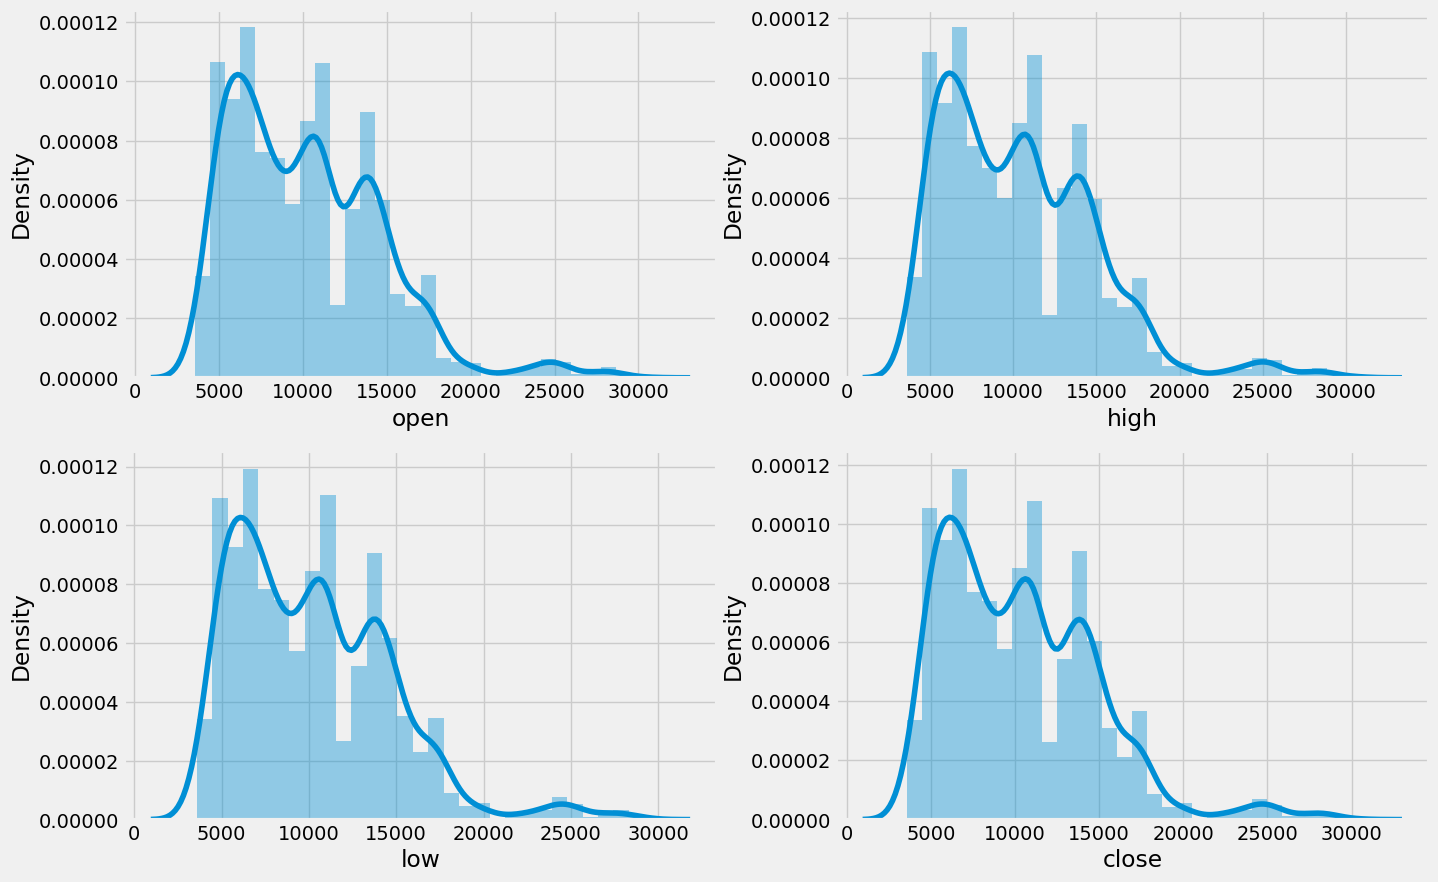

In [175]:
# distributions for variables 

fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15, 10))

for i, column in enumerate(df2.columns):
    sns.distplot(df2[column],ax=axes.flatten()[i])     

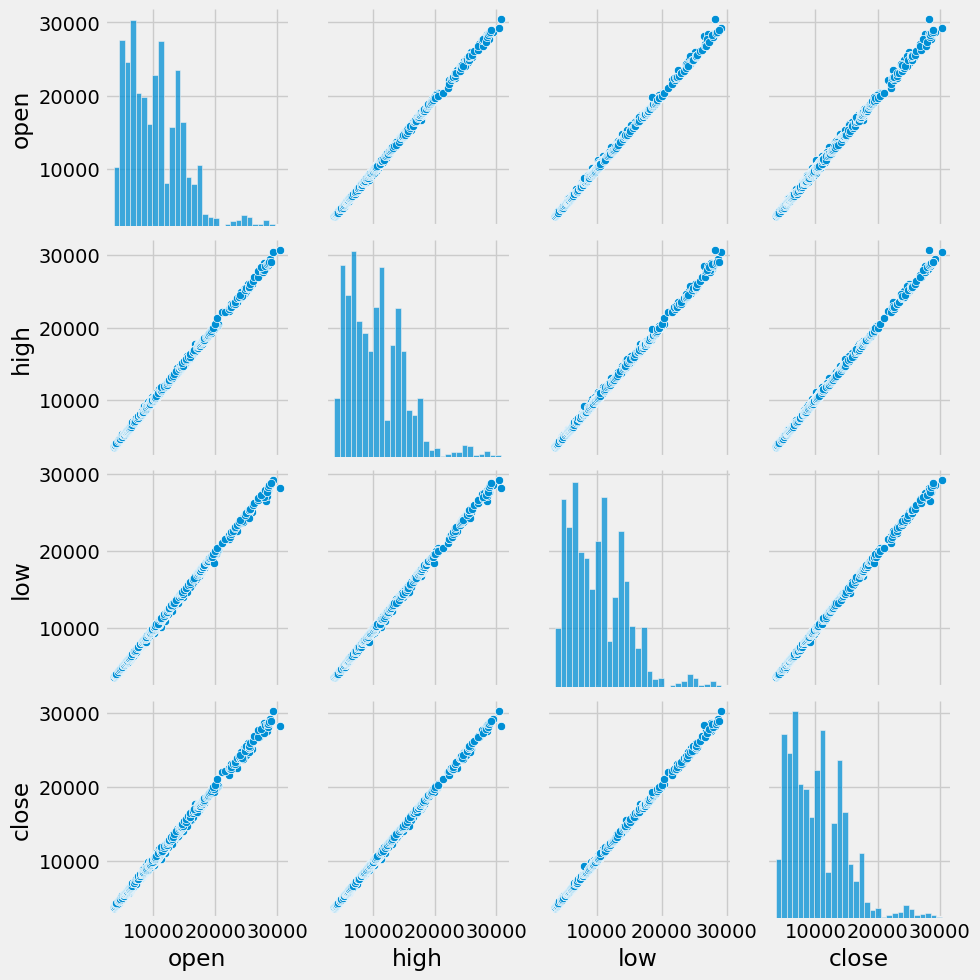

In [176]:
sns.pairplot(df2)

In [177]:
outliers = detect_outliers(df2, 0,df2.columns)
len(outliers)

69

In [178]:
# use z-score to handel the outliers
df2['open_zScore'] = ( df2.open - df2.open.mean() ) / df2.open.std()
df2['high_zScore'] = ( df2.high - df2.high.mean() ) / df2.high.std()
df2['low_zScore'] = ( df2.low - df2.low.mean() ) / df2.low.std()


# Remove the outliers and produce new dataframe
df2 = df2[(df2.open_zScore>-3)& (df2.open_zScore<3) &
          (df2.high_zScore>-3)&(df2.high_zScore<3)&
           (df2.low_zScore>-3)&(df2.low_zScore<3)]

outliers = detect_outliers(df2, 0,df2.columns)
len(outliers)

5

In [179]:
df2.drop(columns=['open_zScore' , 'high_zScore' , 'low_zScore'] , inplace=True)

In [180]:
# null hypothesis test

# calculate Pearson correlation coefficient and p-value
# Create an empty DataFrame to store the correlations and p-values

corr_df = pd.DataFrame(columns=['r', 'p-value'])

for col in df2:
    r , p = stats.pearsonr(df2.close , df2[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)] # Add the r & p for this col into the corr_df
   
        
corr_df.sort_values(by=['r'], ascending=False)    # Sort and display the corr_df

,r,p-value
high,1.000,0.0
low,1.000,0.0
close,1.000,0.0
open,0.999,0.0


In [181]:
# train test split 
x = df2.drop(columns=['close'])
y = df2['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [182]:
# scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [183]:
# choose the model
modles = {
    'Linear Regression' : LinearRegression(),
    'Bayesian Ridge' : BayesianRidge(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
    
 
}


for modelName,model in modles.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('\n**************************************************',' \n[ **********',modelName,'********** ] ','\n**************************************************')
    
    print('\n      Testing Accurcy : ',model.score(X_test, y_test))
    print('\n      Training Accurcy : ',model.score(X_train,y_train ))
    print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
    print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
    print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
    #sns.distplot(y_test-y_pred_test)
 




**************************************************  
[ ********** Linear Regression ********** ]  
**************************************************

      Testing Accurcy :  0.9930493786183219

      Training Accurcy :  0.999843887440406

      MAE: 243.09810816221787

      MSE: 100347.37493441602

      RMSE: 316.7765378534465

**************************************************  
[ ********** Bayesian Ridge ********** ]  
**************************************************

      Testing Accurcy :  0.9930493893991836

      Training Accurcy :  0.9998438873698025

      MAE: 243.0982990503836

      MSE: 100347.21928917001

      RMSE: 316.7762921829378

**************************************************  
[ ********** Lasso ********** ]  
**************************************************

      Testing Accurcy :  0.9924969228860238

      Training Accurcy :  0.9993425684073508

      MAE: 248.12538004614328

      MSE: 108323.27801693958

      RMSE: 329.12501882558183

**********

- **i will choose the Decision Tree Regressor**


**************************************************  
[ ********** Decision Tree Regressor ********** ]  
**************************************************

      Testing Accurcy :  0.9742145473420383

      Training Accurcy :  0.9744451832734459

      MAE: 467.6310592684888

      MSE: 372269.23229379003

      RMSE: 610.1386992264873


<Axes: xlabel='close', ylabel='Density'>

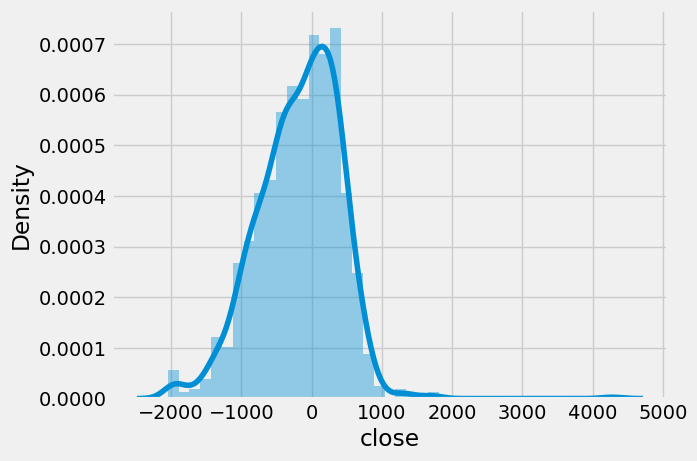

In [184]:
second_model = DecisionTreeRegressor(max_depth=3)
second_model.fit(X_train , y_train)

y_pred_test = second_model.predict(X_test)
y_pred_train = second_model.predict(X_train)
print('\n**************************************************',' \n[ ********** Decision Tree Regressor ********** ] ','\n**************************************************')
    
print('\n      Testing Accurcy : ',second_model.score(X_test, y_test))
print('\n      Training Accurcy : ',second_model.score(X_train,y_train ))
print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

sns.distplot(y_test-y_pred_test)
 

[Text(0.5, 0.875, 'x[2] <= 0.101\nsquared_error = 1.152\nsamples = 3819\nvalue = 2.286'),
 Text(0.25, 0.625, 'x[1] <= -0.904\nsquared_error = 0.356\nsamples = 2134\nvalue = 1.451'),
 Text(0.125, 0.375, 'x[2] <= -1.313\nsquared_error = 0.066\nsamples = 795\nvalue = 0.759'),
 Text(0.0625, 0.125, 'squared_error = 0.01\nsamples = 575\nvalue = 0.614'),
 Text(0.1875, 0.125, 'squared_error = 0.01\nsamples = 220\nvalue = 1.139'),
 Text(0.375, 0.375, 'x[2] <= -0.463\nsquared_error = 0.075\nsamples = 1339\nvalue = 1.862'),
 Text(0.3125, 0.125, 'squared_error = 0.019\nsamples = 486\nvalue = 1.557'),
 Text(0.4375, 0.125, 'squared_error = 0.023\nsamples = 853\nvalue = 2.036'),
 Text(0.75, 0.625, 'x[1] <= 0.837\nsquared_error = 0.159\nsamples = 1685\nvalue = 3.343'),
 Text(0.625, 0.375, 'x[2] <= 0.403\nsquared_error = 0.03\nsamples = 486\nvalue = 2.796'),
 Text(0.5625, 0.125, 'squared_error = 0.006\nsamples = 138\nvalue = 2.56'),
 Text(0.6875, 0.125, 'squared_error = 0.008\nsamples = 348\nvalue = 2.

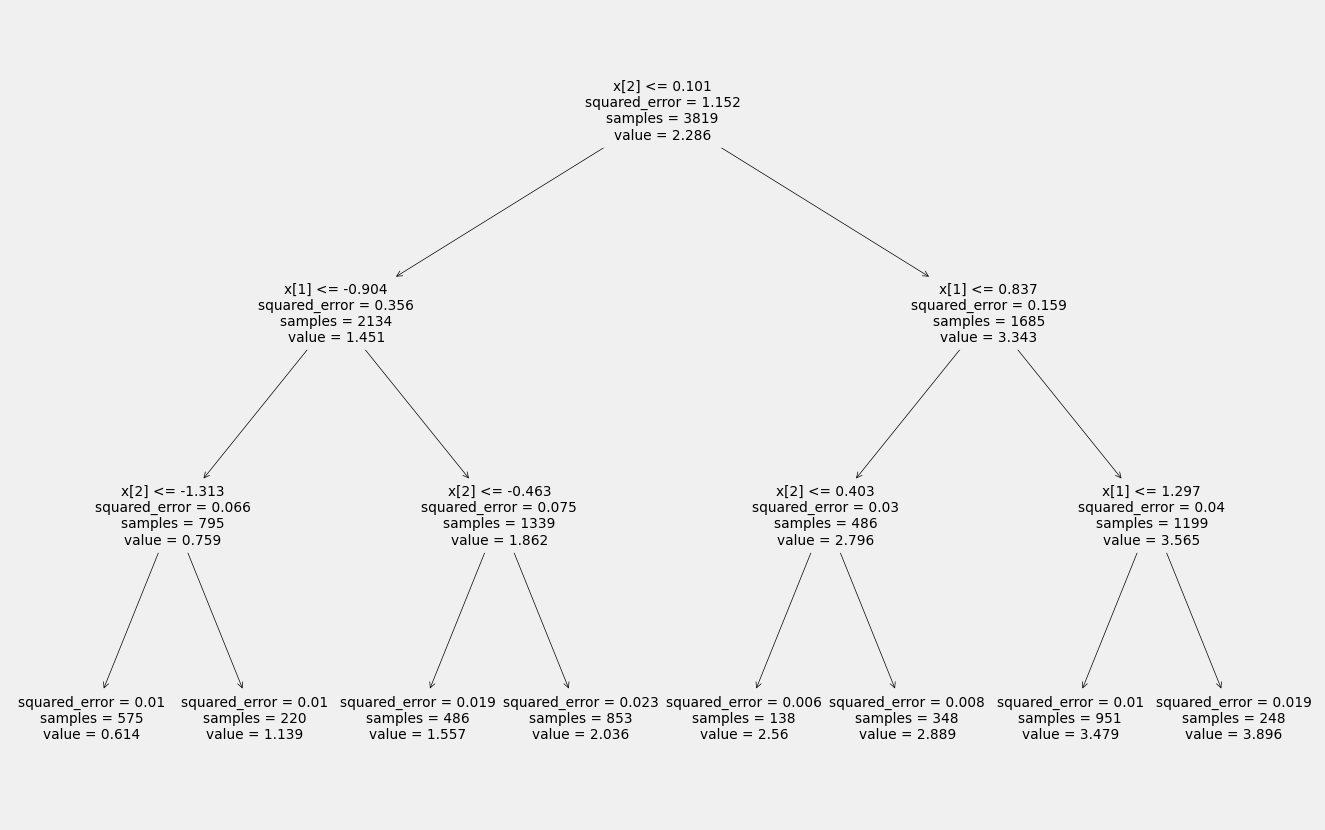

In [58]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(second_model)

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Third Dataset(EGX_DLY_EMFD, 1D) </strong></p>

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2141 non-null   int64  
 1   open    2141 non-null   float64
 2   high    2141 non-null   float64
 3   low     2141 non-null   float64
 4   close   2141 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 83.8 KB


In [62]:
df3.shape

(2141, 5)

In [63]:
df3.head()

,time,open,high,low,close
0,1425542400,1.0,1.0,1.0,1.0
1,1425801600,1.0,1.0,1.0,1.0
2,1425888000,1.0,1.0,1.0,1.0
3,1425974400,1.0,1.0,1.0,1.0
4,1426060800,1.0,1.0,1.0,1.0


In [64]:
df3['open'].nunique()

277

In [65]:
# convert col time to datetime data type

df3['time'] = pd.to_datetime(df3['time'])
df3['year']=df3['time'].dt.year
df3['month']=df3['time'].dt.month
df3['day']=df3['time'].dt.day
df3['hour'] = df3['time'].dt.hour
df3['minute'] = df3['time'].dt.minute

print(df3['year'].unique())
print(df3['month'].unique())
print(df3['hour'].unique())
print(df3['minute'].unique())

[1970]
[1]
[0]
[0]


In [66]:
df3 = df3.drop(columns= ['time','year','month','day','hour','minute'])
df3.head()

,open,high,low,close
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


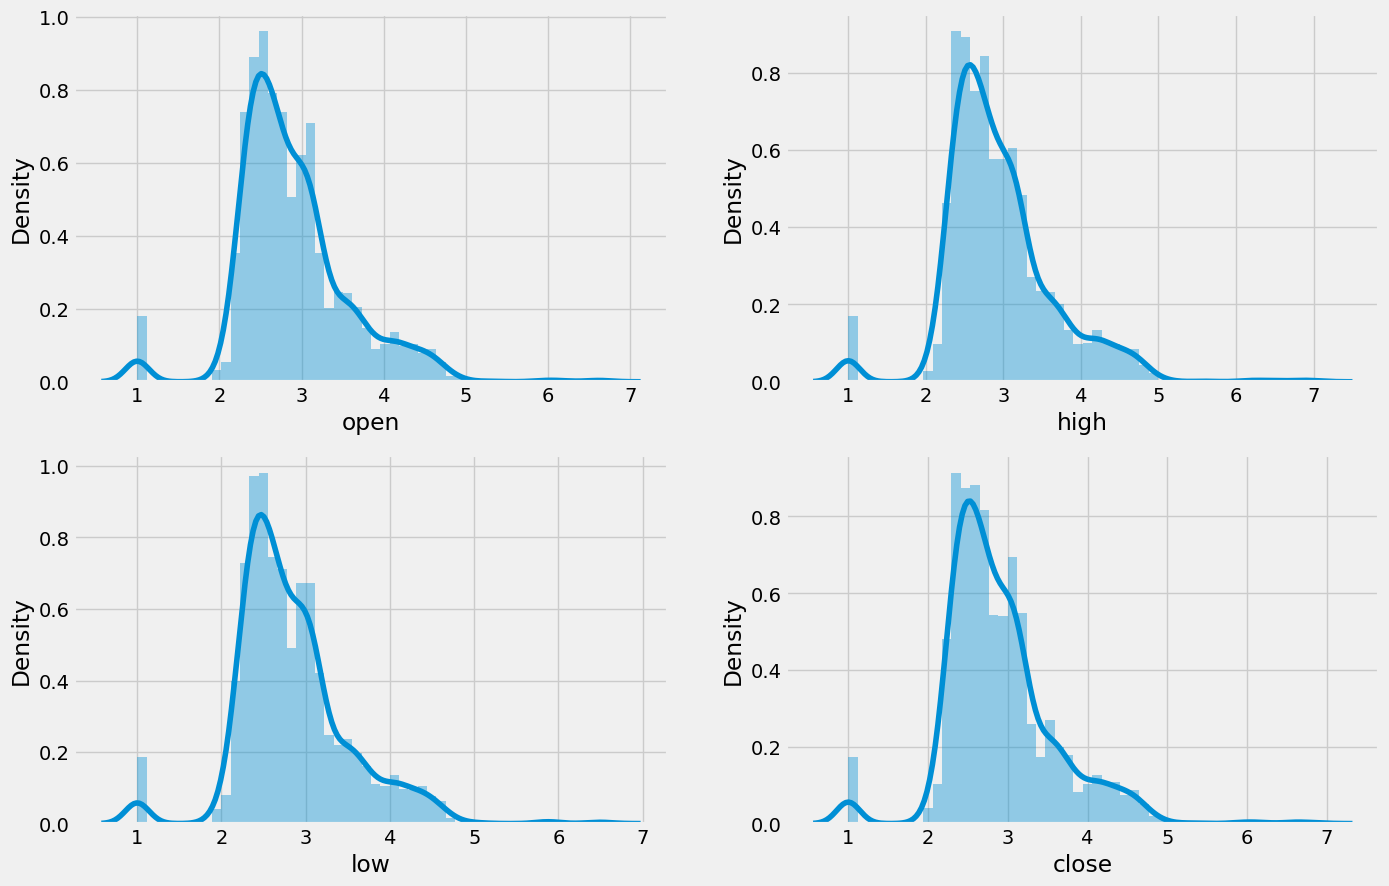

In [67]:
# distributions for variables 

fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15, 10))

for i, column in enumerate(df3.columns):
    sns.distplot(df3[column],ax=axes.flatten()[i])     

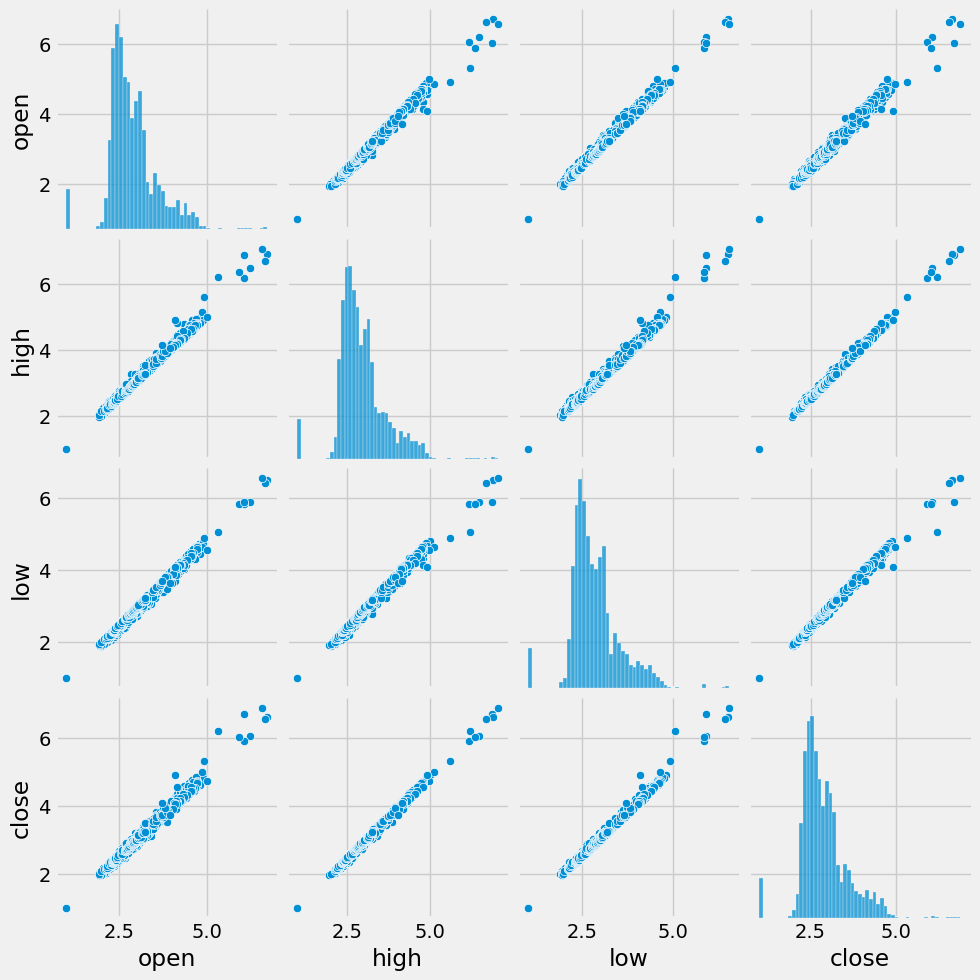

In [68]:
sns.pairplot(df3)

In [69]:
outliers = detect_outliers(df3, 0,df3.columns)
len(outliers)

162

- **Since the number of samples is small, I will not delete the outliers**

In [70]:
# null hypothesis test

# calculate Pearson correlation coefficient and p-value
# Create an empty DataFrame to store the correlations and p-values

corr_df = pd.DataFrame(columns=['r', 'p-value'])

for col in df3:
    r , p = stats.pearsonr(df3.close , df3[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)] # Add the r & p for this col into the corr_df
   
        
corr_df.sort_values(by=['r'], ascending=False)    # Sort and display the corr_df

,r,p-value
close,1.000,0.0
high,0.999,0.0
low,0.997,0.0
open,0.995,0.0


In [71]:
# train test split 
x = df3.drop(columns=['close'])
y = df3['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [72]:
# scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [73]:
# choose the model
modles = {
    'Linear Regression' : LinearRegression(),
    'Bayesian Ridge' : BayesianRidge(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
    
 
}


for modelName,model in modles.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('\n**************************************************',' \n[ **********',modelName,'********** ] ','\n**************************************************')
    
    print('\n      Testing Accurcy : ',model.score(X_test, y_test))
    print('\n      Training Accurcy : ',model.score(X_train,y_train ))
    print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
    print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
    print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
    #sns.distplot(y_test-y_pred_test)
 




**************************************************  
[ ********** Linear Regression ********** ]  
**************************************************

      Testing Accurcy :  0.997572407941971

      Training Accurcy :  0.998650227221849

      MAE: 0.02428453517249943

      MSE: 0.001160326652430715

      RMSE: 0.03406356781710799

**************************************************  
[ ********** Bayesian Ridge ********** ]  
**************************************************

      Testing Accurcy :  0.9975724819393684

      Training Accurcy :  0.9986502257772479

      MAE: 0.02428174197447645

      MSE: 0.001160291283575351

      RMSE: 0.03406304865356815

**************************************************  
[ ********** Lasso ********** ]  
**************************************************

      Testing Accurcy :  -0.0005263985864727427

      Training Accurcy :  0.0

      MAE: 0.5120661452213838

      MSE: 0.47822592057868196

      RMSE: 0.6915388062709728

**********

- **i will choose Linear Regression Model**


**************************************************  
[ ********** Linear Regression Model ********** ]  
**************************************************

      Testing Accurcy :  0.997572407941971

      Training Accurcy :  0.998650227221849

      MAE: 0.02428453517249943

      MSE: 0.001160326652430715

      RMSE: 0.03406356781710799


<Axes: xlabel='close', ylabel='Density'>

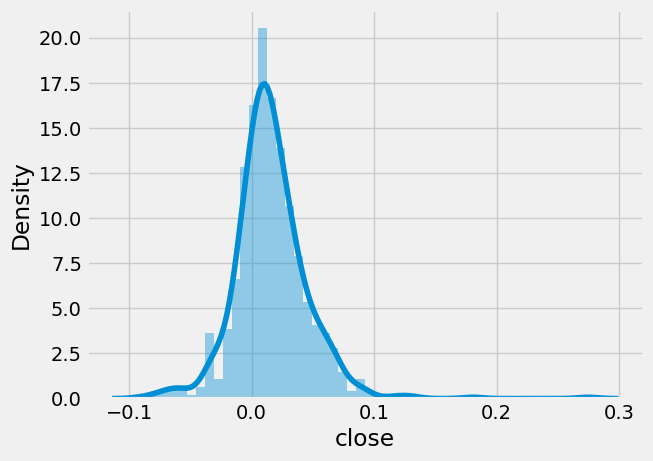

In [78]:
third_model = LinearRegression()
third_model.fit(X_train , y_train)

y_pred_test = third_model.predict(X_test)
y_pred_train = third_model.predict(X_train)
print('\n**************************************************',' \n[ ********** Linear Regression Model ********** ] ','\n**************************************************')
    
print('\n      Testing Accurcy : ',third_model.score(X_test, y_test))
print('\n      Training Accurcy : ',third_model.score(X_train,y_train ))
print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

sns.distplot(y_test-y_pred_test)
 

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Fourth Dataset(EGX_DLY_ISPH, 1D) </strong></p>

In [79]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1503 non-null   int64  
 1   open    1503 non-null   float64
 2   high    1503 non-null   float64
 3   low     1503 non-null   float64
 4   close   1503 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [80]:
df4.head()

,time,open,high,low,close
0,1512979200,3.738949,3.738949,3.738949,3.738949
1,1513065600,3.738949,4.448060,3.738949,4.338470
2,1513152000,4.338470,4.583436,4.338470,4.486739
3,1513238400,4.486739,4.544757,4.383596,4.435167
4,1513497600,4.435167,4.834848,4.435167,4.693026


In [81]:
# convert col time to datetime data type

df4['time'] = pd.to_datetime(df4['time'])
df4['year']=df4['time'].dt.year
df4['month']=df4['time'].dt.month
df4['day']=df4['time'].dt.day
df4['hour'] = df4['time'].dt.hour
df4['minute'] = df4['time'].dt.minute

print(df4['year'].unique())
print(df4['month'].unique())
print(df4['hour'].unique())
print(df4['minute'].unique())

[1970]
[1]
[0]
[0]


In [82]:
df4 = df4.drop(columns= ['time','year','month','day','hour','minute'])
df4.head()

,open,high,low,close
0,3.738949,3.738949,3.738949,3.738949
1,3.738949,4.448060,3.738949,4.338470
2,4.338470,4.583436,4.338470,4.486739
3,4.486739,4.544757,4.383596,4.435167
4,4.435167,4.834848,4.435167,4.693026


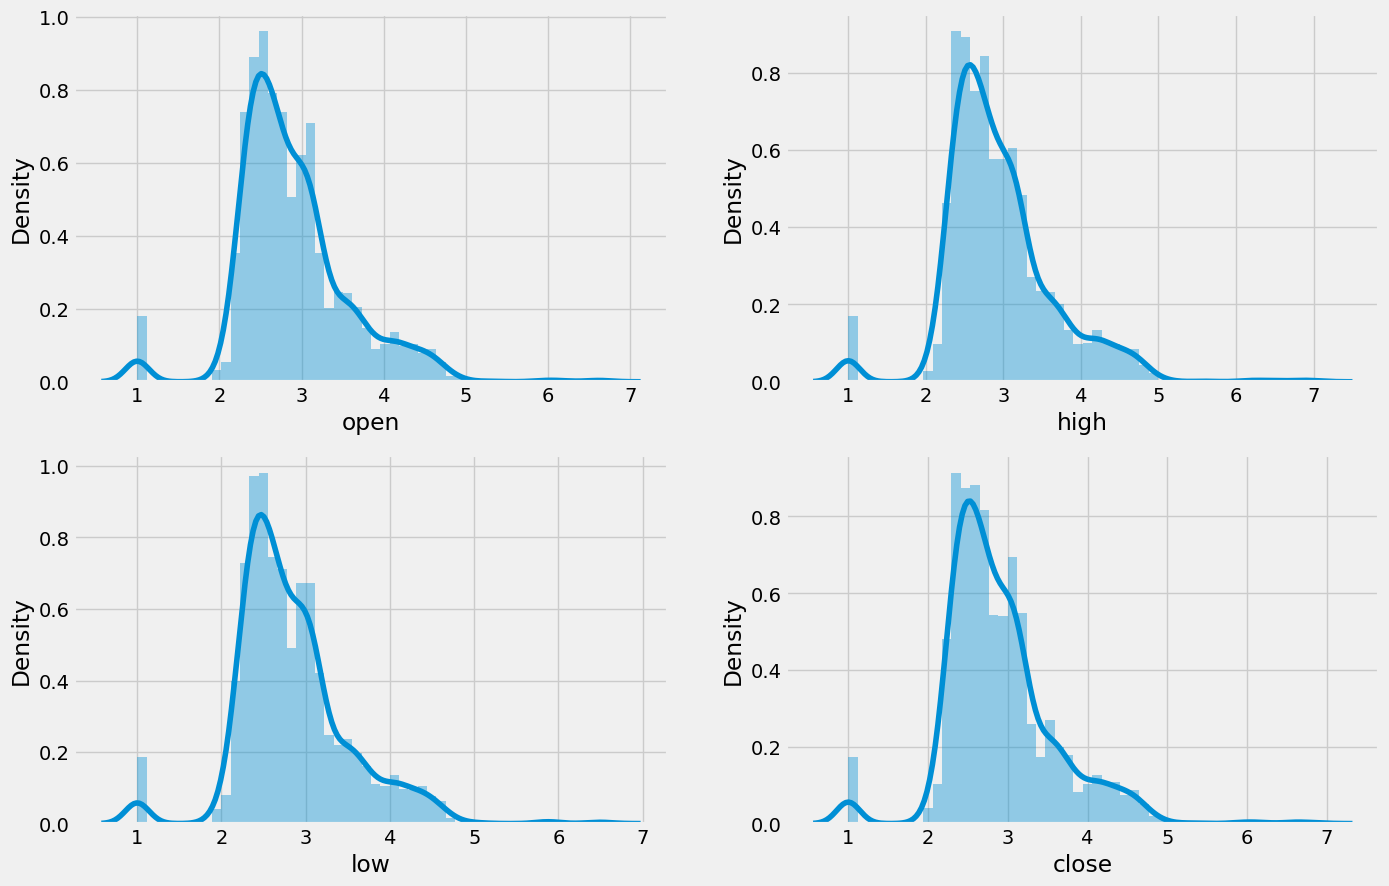

In [83]:
# distributions for variables 

fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15, 10))

for i, column in enumerate(df3.columns):
    sns.distplot(df3[column],ax=axes.flatten()[i])     

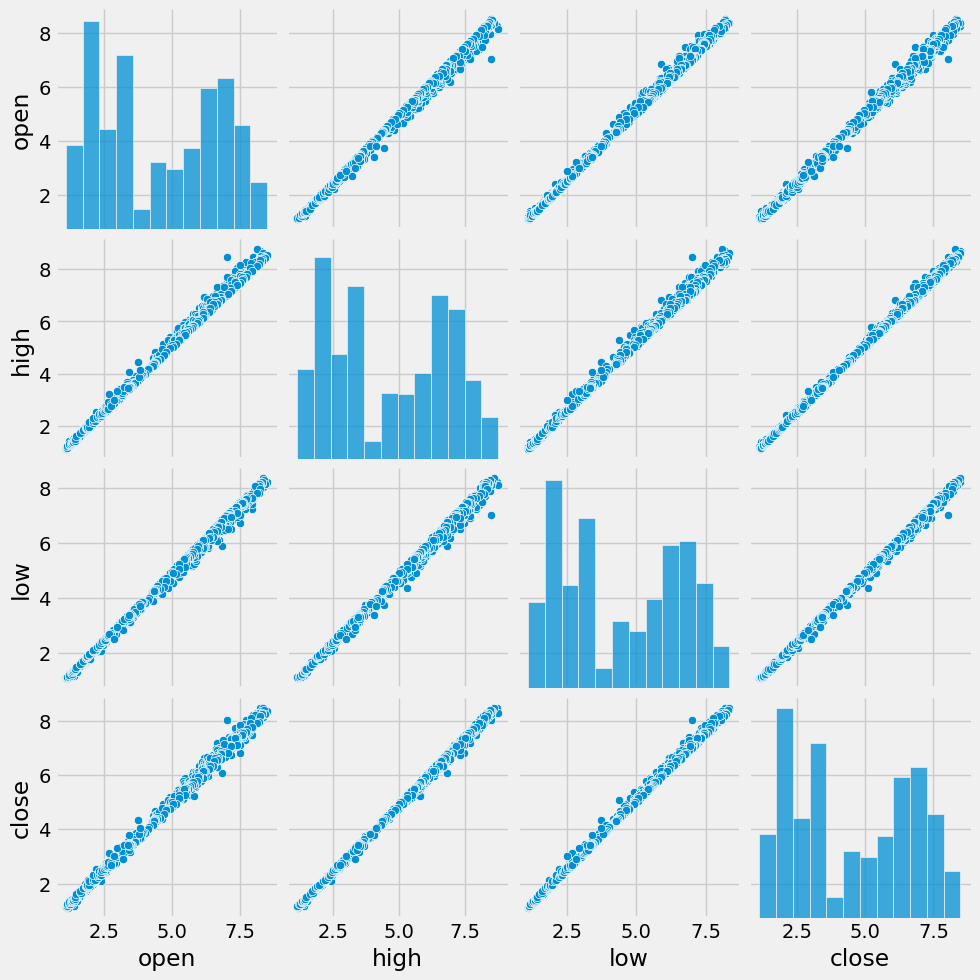

In [84]:
sns.pairplot(df4)

In [85]:
outliers = detect_outliers(df4, 0,df4.columns)
len(outliers)

0

- **thire is no outliers** 

In [86]:
# null hypothesis test

# calculate Pearson correlation coefficient and p-value
# Create an empty DataFrame to store the correlations and p-values

corr_df = pd.DataFrame(columns=['r', 'p-value'])

for col in df4:
    r , p = stats.pearsonr(df4.close , df4[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)] # Add the r & p for this col into the corr_df
   
        
corr_df.sort_values(by=['r'], ascending=False)    # Sort and display the corr_df

,r,p-value
close,1.000,0.0
open,0.999,0.0
high,0.999,0.0
low,0.999,0.0


In [87]:
# train test split 
x = df4.drop(columns=['close'])
y = df4['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [88]:
# scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [89]:
# choose the model
modles = {
    'Linear Regression' : LinearRegression(),
    'Bayesian Ridge' : BayesianRidge(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
    
 
}


for modelName,model in modles.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('\n**************************************************',' \n[ **********',modelName,'********** ] ','\n**************************************************')
    
    print('\n      Testing Accurcy : ',model.score(X_test, y_test))
    print('\n      Training Accurcy : ',model.score(X_train,y_train ))
    print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
    print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
    print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
    #sns.distplot(y_test-y_pred_test)
 




**************************************************  
[ ********** Linear Regression ********** ]  
**************************************************

      Testing Accurcy :  0.9994348406038273

      Training Accurcy :  0.999591785267575

      MAE: 0.03463730876474988

      MSE: 0.0026168733479012174

      RMSE: 0.05115538434907138

**************************************************  
[ ********** Bayesian Ridge ********** ]  
**************************************************

      Testing Accurcy :  0.9994344013629712

      Training Accurcy :  0.9995917842456796

      MAE: 0.034641577682465084

      MSE: 0.002618907177113476

      RMSE: 0.0511752594239978

**************************************************  
[ ********** Lasso ********** ]  
**************************************************

      Testing Accurcy :  0.7881176597261472

      Training Accurcy :  0.7857327870734794

      MAE: 0.9009385369044405

      MSE: 0.9810847221305501

      RMSE: 0.990497209552127


- **I will choose the Random Forest Regressor**


**************************************************  
[ ********** Random Fotest Regressor ********** ]  
**************************************************

      Testing Accurcy :  0.9990881667525237

      Training Accurcy :  0.9999007752885177

      MAE: 0.042604459405554185

      MSE: 0.004222086970879626

      RMSE: 0.06497758821993646


<Axes: xlabel='close', ylabel='Density'>

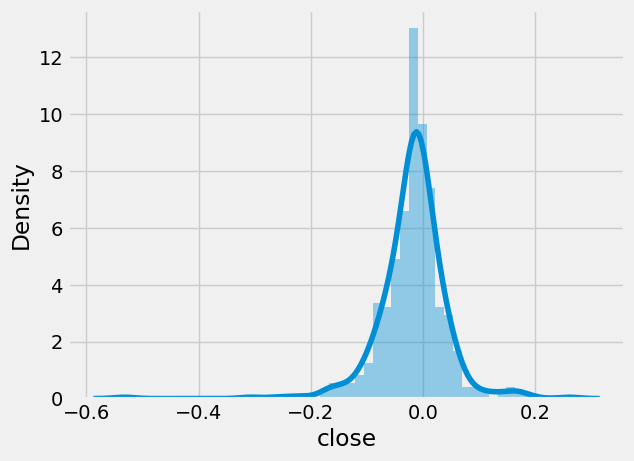

In [90]:
Fourth_model = RandomForestRegressor()
Fourth_model.fit(X_train , y_train)

y_pred_test =Fourth_model.predict(X_test)
y_pred_train = Fourth_model.predict(X_train)
print('\n**************************************************',' \n[ ********** Random Fotest Regressor ********** ] ','\n**************************************************')
    
print('\n      Testing Accurcy : ',Fourth_model.score(X_test, y_test))
print('\n      Training Accurcy : ',Fourth_model.score(X_train,y_train ))
print('\n      MAE:',metrics.mean_absolute_error(y_test,y_pred_test))
print('\n      MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('\n      RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

sns.distplot(y_test-y_pred_test)
 